In [1]:
import collections
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import pandas as pd
import pickle

## Getting the data

In [2]:
output_path = f"../../../data/04_communities"

# [(comm_id, comm, comm_political_composition), ..., (comm_id, comm, comm_political_composition)]
before_comms_data = pickle.load(open(os.path.join(output_path, 'before_communities_all_data.pickle'), 'rb'))
during_comms_data = pickle.load(open(os.path.join(output_path, 'during_communities_all_data.pickle'), 'rb'))
after_comms_data = pickle.load(open(os.path.join(output_path, 'after_communities_all_data.pickle'), 'rb'))

In [4]:
# load party info
output_path = f"../../../data/04_communities"

before_parties = pickle.load(open(os.path.join(output_path, 'before_parties.pickle'), 'rb'))
during_parties = pickle.load(open(os.path.join(output_path, 'during_parties.pickle'), 'rb'))
after_parties = pickle.load(open(os.path.join(output_path, 'after_parties.pickle'), 'rb'))

In [5]:
party_acronyms = {
    'Alleanza Verdi Sinistra': 'AVS',
    'Azione - Italia Viva': 'Az-Iv',
    'Forza Italia': 'FI',
    "Fratelli d'Italia": 'FdI',
    'Lega': 'L',
    'Movimento 5s': 'M5s',
    'Noi moderati': 'NM',
    'Partito Democratico': 'PD'
}

In [6]:
# sort before_comms_data by the size of the communities
sorted_before_comms_data = sorted(before_comms_data, key=lambda x: len(x[1]), reverse=True)
sorted_during_comms_data = sorted(during_comms_data, key=lambda x: len(x[1]), reverse=True)
sorted_after_comms_data = sorted(after_comms_data, key=lambda x: len(x[1]), reverse=True)

In [8]:
before_top_comms_idxs = [data[0] for data in sorted_before_comms_data]
during_top_comms_idxs = [data[0] for data in sorted_during_comms_data]
after_top_comms_idxs = [data[0] for data in sorted_after_comms_data]

In [9]:
before_top_comms_idxs, during_top_comms_idxs, after_top_comms_idxs

([3, 7, 1, 6, 2, 0, 9, 8, 4, 10, 5],
 [5, 7, 0, 4, 2, 10, 1, 12, 11, 8, 13, 9, 3, 6],
 [7, 15, 6, 2, 1, 0, 5, 8, 10, 14, 11, 13, 4, 3, 9, 12])

In [10]:
before_top_comms_size = [len(data[1]) for data in sorted_before_comms_data]
during_top_comms_size = [len(data[1]) for data in sorted_during_comms_data]
after_top_comms_size = [len(data[1]) for data in sorted_after_comms_data]

In [11]:
before_top_comms_size, during_top_comms_size, after_top_comms_size

([2827, 2549, 2057, 1845, 1832, 406, 92, 89, 85, 33, 29],
 [3942, 3205, 2874, 2700, 2568, 486, 478, 227, 216, 165, 46, 40, 23, 22],
 [3870, 2435, 2244, 2065, 1940, 1418, 421, 94, 74, 74, 67, 49, 36, 33, 27, 27])

## Migration analysis

### Before -> During -> After (all data)

In [12]:
before_during_migration = np.zeros([len(sorted_before_comms_data), len(sorted_during_comms_data)])
during_after_migration = np.zeros([len(sorted_during_comms_data), len(sorted_after_comms_data)])

In [13]:
def find_overlap(comm1, comm2, normalized=False):
    if normalized:
        return len(set(comm1).intersection(set(comm2))) / len(set(comm1)) #len(set(comm1).union(set(comm2)))

    return len(set(comm1).intersection(set(comm2)))

In [14]:
for i in range(0, len(sorted_before_comms_data)):
    for j in range(0, len(sorted_during_comms_data)):
        before_during_migration[i][j] = find_overlap(
                                            sorted_before_comms_data[i][1], 
                                            sorted_during_comms_data[j][1], 
                                            normalized=True
                                        )

In [15]:
for i in range(0, len(sorted_during_comms_data)):
    for j in range(0, len(sorted_after_comms_data)):
        during_after_migration[i][j] = find_overlap(
                                        sorted_during_comms_data[i][1], 
                                        sorted_after_comms_data[j][1], 
                                        normalized=True
                                    )

In [16]:
def get_label(comm_comp):
    parties = list(set(comm_comp))
    parties_acr = [party_acronyms[party] for party in parties]
    label = ";".join(parties_acr) 
    return label

In [17]:
def expand_label_with_size(label, comm):
    size = ' (' + str(len(comm)) + ')'
    return label+size

In [18]:
before_labels = [get_label(sorted_before_comms_data[comm_id][2]) for comm_id in range(0, len(sorted_before_comms_data))]
during_labels = [get_label(sorted_during_comms_data[comm_id][2]) for comm_id in range(0, len(sorted_during_comms_data))]
after_labels = [get_label(sorted_after_comms_data[comm_id][2]) for comm_id in range(0, len(sorted_after_comms_data))]
                
before_labels_size = [expand_label_with_size(before_labels[comm_id], sorted_before_comms_data[comm_id][1]) for comm_id in range(0, len(sorted_before_comms_data))]
during_labels_size = [expand_label_with_size(during_labels[comm_id], sorted_during_comms_data[comm_id][1]) for comm_id in range(0, len(sorted_during_comms_data))]
after_labels_size = [expand_label_with_size(after_labels[comm_id], sorted_after_comms_data[comm_id][1]) for comm_id in range(0, len(sorted_after_comms_data))]

#### Plotting the migration

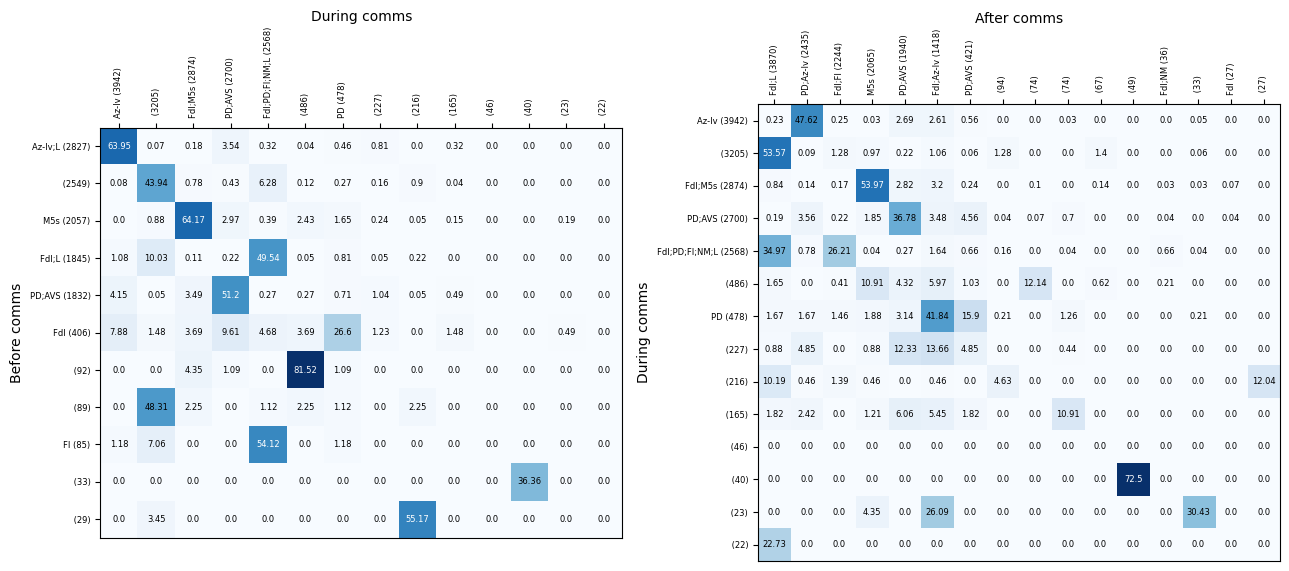

In [23]:
# plot a heatmap of the migration matrix
fig, ax = plt.subplots(1, 2, figsize=(13, 13))

text_colors = {True: 'white', False: 'black'}

im = ax[0].imshow(before_during_migration, cmap='Blues')
im = ax[1].imshow(during_after_migration, cmap='Blues')

# y-labels
ax[0].xaxis.set_label_position('top')
ax[0].set_ylabel('Before comms')
ax[0].set_xlabel('During comms')

ax[1].xaxis.set_label_position('top')
ax[1].set_ylabel('During comms')
ax[1].set_xlabel('After comms')

# Loop over data dimensions and create text annotations.
for i in range(0, len(sorted_before_comms_data)):
    for j in range(0, len(sorted_during_comms_data)):
        val = round(before_during_migration[i, j] * 100, 2) 
        text = ax[0].text(j, i, val, ha="center", va="center", size=6, color=text_colors[val > 49])

for i in range(0, len(sorted_during_comms_data)):
    for j in range(0, len(sorted_after_comms_data)):
        val1 = round(during_after_migration[i, j] * 100, 2)
        text = ax[1].text(j, i, val1, ha="center", va="center", size=6, color=text_colors[val1 > 49])

# We want to show all ticks...
ax[0].xaxis.tick_top()
ax[0].set_xticks(np.arange(len(sorted_during_comms_data)));
ax[0].set_yticks(np.arange(len(sorted_before_comms_data)));
ax[0].set_xticklabels(during_labels_size, rotation=90, size=6)
ax[0].set_yticklabels(before_labels_size, size=6)

ax[1].xaxis.tick_top()
ax[1].set_yticks(np.arange(len(sorted_during_comms_data)));
ax[1].set_xticks(np.arange(len(sorted_after_comms_data)));
ax[1].set_xticklabels(after_labels_size, rotation=90, size=6)
ax[1].set_yticklabels(during_labels_size, size=6)

fig.tight_layout()

In [60]:
# latex data before -> during
for i in range(0, len(sorted_before_comms_data)):
    print('{', end="")
    for j in range(0, len(sorted_during_comms_data)-1):
        print(f'{before_during_migration[i, j]*100:.1f}', end=',')
    print(f'{before_during_migration[i, -1]*100:.1f}', end="")
    print('},')

{64.0,0.1,0.2,3.5,0.3,0.0,0.5,0.8,0.0,0.3,0.0,0.0,0.0,0.0},
{0.1,43.9,0.8,0.4,6.3,0.1,0.3,0.2,0.9,0.0,0.0,0.0,0.0,0.0},
{0.0,0.9,64.2,3.0,0.4,2.4,1.7,0.2,0.0,0.1,0.0,0.0,0.2,0.0},
{1.1,10.0,0.1,0.2,49.5,0.1,0.8,0.1,0.2,0.0,0.0,0.0,0.0,0.0},
{4.1,0.1,3.5,51.2,0.3,0.3,0.7,1.0,0.1,0.5,0.0,0.0,0.0,0.0},
{7.9,1.5,3.7,9.6,4.7,3.7,26.6,1.2,0.0,1.5,0.0,0.0,0.5,0.0},
{0.0,0.0,4.3,1.1,0.0,81.5,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0},
{0.0,48.3,2.2,0.0,1.1,2.2,1.1,0.0,2.2,0.0,0.0,0.0,0.0,0.0},
{1.2,7.1,0.0,0.0,54.1,0.0,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0},
{0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.4,0.0,0.0},
{0.0,3.4,0.0,0.0,0.0,0.0,0.0,0.0,55.2,0.0,0.0,0.0,0.0,0.0},


In [68]:
# latex data before -> during
for i in range(0, len(sorted_during_comms_data)):
    print('{', end="")
    for j in range(0, len(sorted_after_comms_data)-1):
        print(f'{during_after_migration[i, j]*100:.1f}', end=',')
    print(f'{during_after_migration[i, -1]*100:.1f}', end="")
    print('},')

{0.2,47.6,0.3,0.0,2.7,2.6,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0},
{53.6,0.1,1.3,1.0,0.2,1.1,0.1,1.3,0.0,0.0,1.4,0.0,0.0,0.1,0.0,0.0},
{0.8,0.1,0.2,54.0,2.8,3.2,0.2,0.0,0.1,0.0,0.1,0.0,0.0,0.0,0.1,0.0},
{0.2,3.6,0.2,1.9,36.8,3.5,4.6,0.0,0.1,0.7,0.0,0.0,0.0,0.0,0.0,0.0},
{35.0,0.8,26.2,0.0,0.3,1.6,0.7,0.2,0.0,0.0,0.0,0.0,0.7,0.0,0.0,0.0},
{1.6,0.0,0.4,10.9,4.3,6.0,1.0,0.0,12.1,0.0,0.6,0.0,0.2,0.0,0.0,0.0},
{1.7,1.7,1.5,1.9,3.1,41.8,15.9,0.2,0.0,1.3,0.0,0.0,0.0,0.2,0.0,0.0},
{0.9,4.8,0.0,0.9,12.3,13.7,4.8,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0},
{10.2,0.5,1.4,0.5,0.0,0.5,0.0,4.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0},
{1.8,2.4,0.0,1.2,6.1,5.5,1.8,0.0,0.0,10.9,0.0,0.0,0.0,0.0,0.0,0.0},
{0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0},
{0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.5,0.0,0.0,0.0,0.0},
{0.0,0.0,0.0,4.3,0.0,26.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.4,0.0,0.0},
{22.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0},


### Before -> During -> After (political representatives migration)

#### Migration data

In [25]:
representatives_df = pd.read_csv("../../../data/00_raw_data/twitter_representatives_handles_final.csv")
representatives_ids = representatives_df["ids"].values

In [26]:
def find_community(id, comms_data):
    for idx in range(0, len(comms_data)):
        comm = comms_data[idx][1]
        if id in comm:
            return idx
    return None

In [27]:
representatives_communities = pd.DataFrame(columns=['user_id', 'period', 'community_id', 'community_label'])

bd_changes = 0
da_changes = 0

for repr in representatives_ids:
    b_comm = find_community(repr, before_comms_data) #sorted_before_comms_data
    b_label = get_label(before_comms_data[b_comm][2]) if b_comm is not None else None
    representatives_communities.loc[len(representatives_communities)] = (repr, 'before', b_comm, b_label)

    d_comm = find_community(repr, during_comms_data)#sorted_during_comms_data
    d_label = get_label(during_comms_data[d_comm][2]) if d_comm is not None else None
    representatives_communities.loc[len(representatives_communities)] = (repr, 'during', d_comm, d_label)

    a_comm = find_community(repr, after_comms_data)#sorted_after_comms_data
    a_label = get_label(after_comms_data[a_comm][2]) if a_comm is not None else None
    representatives_communities.loc[len(representatives_communities)] = (repr, 'after', a_comm, a_label)

    if b_label != d_label:
        bd_changes += 1

    if d_label != a_label:
        da_changes += 1

In [28]:
bd_changes, da_changes

(128, 132)

In [29]:
representatives_communities

,user_id,period,community_id,community_label
0,425752285,before,2,PD;AVS
1,425752285,during,4,PD;AVS
2,425752285,after,5,PD;AVS
3,417961167,before,None,None
4,417961167,during,None,None
...,...,...,...,...
1741,722386906189840384,during,None,None
1742,722386906189840384,after,None,None
1743,543289277,before,None,None
1744,543289277,during,None,None


In [30]:
representatives_communities.dropna(inplace=True)

In [32]:
output_path = f"../../../data/04_communities"
representatives_communities.to_csv(os.path.join(output_path, 'representatives_communities.csv'), index=False)

#### Migration matrix

In [33]:
before_during_repr_migration = np.zeros([len(sorted_before_comms_data), len(sorted_during_comms_data)])
during_after_repr_migration = np.zeros([len(sorted_during_comms_data), len(sorted_after_comms_data)])

In [34]:
def find_repr_overlap(comm1, comm2, representatives_ids, normalized=False):
    _comm1 = set(comm1).intersection(set(representatives_ids))
    _comm2 = set(comm2).intersection(set(representatives_ids))

    if len(set(_comm1)) == 0:
        return 0 

    if normalized:
        return len(set(_comm1).intersection(set(_comm2))) / len(set(_comm1)) #len(set(comm1).union(set(comm2)))

    return len(set(_comm1).intersection(set(_comm2)))

In [35]:
for i in range(0, len(sorted_before_comms_data)):
    for j in range(0, len(sorted_during_comms_data)):
        before_during_repr_migration[i][j] = find_repr_overlap(
                                                sorted_before_comms_data[i][1], 
                                                sorted_during_comms_data[j][1], 
                                                representatives_ids, 
                                                normalized=True
                                            )

In [36]:
for i in range(0, len(sorted_during_comms_data)):
    for j in range(0, len(sorted_after_comms_data)):
        during_after_repr_migration[i][j] = find_repr_overlap(
                                                sorted_during_comms_data[i][1], 
                                                sorted_after_comms_data[j][1], 
                                                representatives_ids, 
                                                normalized=True
                                            )

In [37]:
def expand_label_with_repr_size(label, comm, representatives_ids):
    _comm = set(comm).intersection(set(representatives_ids))
    size = ' (' + str(len(_comm)) + ')'
    return label+size

In [38]:
before_labels_repr_size = [expand_label_with_repr_size(before_labels[i], sorted_before_comms_data[i][1], representatives_ids) for i in range(0, len(sorted_before_comms_data))]
during_labels_repr_size = [expand_label_with_repr_size(during_labels[i], sorted_during_comms_data[i][1], representatives_ids) for i in range(0, len(sorted_during_comms_data))]
after_labels_repr_size = [expand_label_with_repr_size(after_labels[i], sorted_after_comms_data[i][1], representatives_ids) for i in range(0, len(sorted_after_comms_data))]

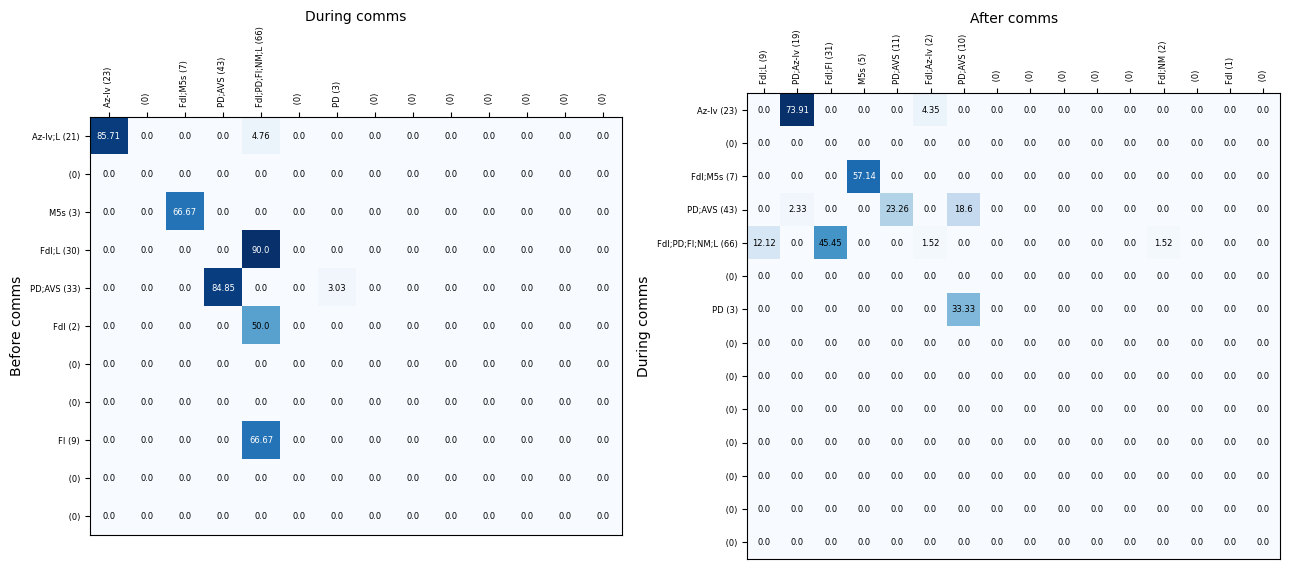

In [39]:
# plot a heatmap of the migration matrix
fig, ax = plt.subplots(1, 2, figsize=(13, 13))

text_colors = {True: 'white', False: 'black'}

im = ax[0].imshow(before_during_repr_migration, cmap='Blues')
im = ax[1].imshow(during_after_repr_migration, cmap='Blues')

# y-labels
ax[0].xaxis.set_label_position('top')
ax[0].set_ylabel('Before comms')
ax[0].set_xlabel('During comms')

ax[1].xaxis.set_label_position('top')
ax[1].set_ylabel('During comms')
ax[1].set_xlabel('After comms')

# Loop over data dimensions and create text annotations.
for i in range(len(sorted_before_comms_data)):
    for j in range(len(sorted_during_comms_data)):
        val = round(before_during_repr_migration[i, j] * 100, 2) 
        text = ax[0].text(j, i, val, ha="center", va="center", size=6, color=text_colors[val > 50])

for i in range(len(sorted_during_comms_data)):
    for j in range(len(sorted_after_comms_data)):
        val1 = round(during_after_repr_migration[i, j] * 100, 2)
        text = ax[1].text(j, i, val1, ha="center", va="center", size=6, color=text_colors[val1 > 50])

# We want to show all ticks...
ax[0].xaxis.tick_top()
ax[0].set_xticks(np.arange(len(sorted_during_comms_data)));
ax[0].set_yticks(np.arange(len(sorted_before_comms_data)));
ax[0].set_xticklabels(during_labels_repr_size, rotation=90, size=6)
ax[0].set_yticklabels(before_labels_repr_size, size=6)

ax[1].xaxis.tick_top()
ax[1].set_yticks(np.arange(len(sorted_during_comms_data)));
ax[1].set_xticks(np.arange(len(sorted_after_comms_data)));
ax[1].set_xticklabels(after_labels_repr_size, rotation=90, size=6)
ax[1].set_yticklabels(during_labels_repr_size, size=6)

fig.tight_layout()
